# Session 1

---------------------------------

# (1) Setup

## (1.1) Installing Python and packages

### Python and Anaconda

If you haven't done it yet, you need to install Python.
I recommend the [Anaconda Distribution](https://www.anaconda.com/download/), and you should install version `3.X`.
- If you're on Windows, you will get a program called *Anaconda Prompt*. Open in and run `conda --version` to verify that everything works.
- If you're on Linux, open a terminal and run `conda --version`.

Type `conda list` to see every installed package, and `conda update --all` to update every package. Type `python` to open an interactive Python terminal, and `exit()` to leave.

### NumPy, matplotlib and Pandas

![](https://indranilsinharoy.files.wordpress.com/2013/01/scientificpythonecosystemsi.png?w=584&h=442)

*Image source: https://indranilsinharoy.com/2013/01/06/python-for-scientific-computing-a-collection-of-resources/*

To install indiviual packages, run `conda install <package>`.   
The Anaconda distribution comes with 3 packages which this tutorial requires, namely [pandas](https://pandas.pydata.org/), [NumPy](http://www.numpy.org/) and [matplotlib](https://matplotlib.org/).
We'll also briefly use [sklearn](https://scikit-learn.org/stable/).

- **NumPy** implements $n$-dimensional arrays in Python for efficient numerical computations. See the [arXiv](https://arxiv.org/pdf/1102.1523.pdf) paper for a nice introduction. To learn basic NumPy, consider doing these [100 NumPy exercises](https://github.com/rougier/numpy-100). For an in-depth look at NumPy and vectorization to speed up scientific computing, see [From Python to Numpy
](https://www.labri.fr/perso/nrougier/from-python-to-numpy/).
- **Matplotlib** is the most popular library for plotting in Python. See the beautiful [gallery](https://matplotlib.org/gallery.html) to get an overview of the capabilities of matplotlib. Read the [Matplotlib tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/matplotlib.html) by Nicolas P. Rougier for an introduction.
- **Pandas** is a library for data analysis based on two objects, the [Series](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) and the [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

### Jupyter

A [Jupyter Notebook](https://jupyter-notebook.readthedocs.io/en/stable/) is an environment for running Python code interactively, displaying graphs and working with data. Think of it as a tool with capabilities somewhere between a simple terminal and a full fledged IDE. Move to a directory using the `cd` command in the terminal, then run `jupyter notebook` to start up a notebook. A video introduction to JupyterLab is [JupyterLab: Building Blocks for Interactive Computing](https://www.youtube.com/watch?v=Ejh0ftSjk6g). See also this list of [28 Jupyter Notebook tips](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/).

## (1.2) Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sklearn
%matplotlib inline

### Using Jupyter Notebooks

- Useful shortcuts: `SHIFT + TAB`, `SHIFT + ENTER`, `ESC`, `ENTER`, `E`, `A`, `D,D`, `I, I`. Type `H` to see all shortcuts.
- Executing terminal commands from within the notebook using `!`.
- Using markdown and $\LaTeX{}$.
- Timing cells using `%%timeit` and other built-in magic commands.
- Pitfalls when using notebooks: state, order of execution, tidyness.

Example of $\LaTeX{}$ usage in notebooks:

$$0 \leq
  \left[\operatorname{tr}(\mathbf{A} \mathbf{B})\right]^2 \leq
  \operatorname{tr}\left(\mathbf{A}^2\right) \operatorname{tr}\left(\mathbf{B}^2\right) \leq
  \left[\operatorname{tr}(\mathbf{A})\right]^2 \left[\operatorname{tr}(\mathbf{B})\right]^2$$
$$\varphi_X(t) = \operatorname{E}\left[\exp \left ({i\int_\mathbf{R} t(s)X(s)ds} \right ) \right]$$

# (2) Importing data

Starting a cell with a `!` let's us use terminal commands. The UNIX `head` command shows the first rows of the file.

## (2.1) Importing `.csv` files

In [2]:
!ls data

google_trends.csv   wine_data.csv
movie_metadata.csv  world_population_history.csv


The file has many columns, so we'll only load a couple into a pandas DataFrame.
To familiarize ourselves with with [magic commands](http://ipython.readthedocs.io/en/stable/interactive/magics.html), we'll use `%%time` to time the execution of the cell below.

In [3]:
cols_to_use = ['movie_title', 'director_name', 'country', 'content_rating', 'imdb_score', 'gross']
df = pd.read_csv(r'data/movie_metadata.csv', sep=',', usecols=cols_to_use)

print(f'Loaded data of size {df.shape} into memory.')

Loaded data of size (5043, 6) into memory.


In [4]:
df.head(2)  # Show the top 2 rows

,director_name,gross,movie_title,country,content_rating,imdb_score
0,James Cameron,760505847.0,Avatar,USA,PG-13,7.9
1,Gore Verbinski,309404152.0,Pirates of the Caribbean: At World's End,USA,PG-13,7.1


The `df.shape` attribute gives the rows and columns of the DataFrame.

In [5]:
df.shape  # Alternatively, use len(df) for row count

(5043, 6)

**Reading a HTML table from the web**

In [6]:
# Read HTML tables into a list of DataFrame objects.
url = r'https://en.wikipedia.org/wiki/List_of_Germans_by_net_worth'
tables = pd.read_html(url, header=0)

df_net_worth = tables[0]

# Asserts can be useful for sanity checks
assert len(df_net_worth) > 0 
assert df_net_worth.Name.is_unique

df_net_worth.head()

,World ranking,Name,Citizenship,Net worth (USD),Sources of wealth
0,23,Beate Heister (b. Albrecht) & Karl Albrecht Jr.,Germany,36.1 billion,Aldi Süd
1,36,Dieter Schwarz,Germany,22.6 billion,Schwarz Gruppe
2,46,Susanne Klatten,Germany,21.0 billion,"BMW, Altana, Nordex, SGL Carbon"
3,60,Stefan Quandt,Germany,17.5 billion,BMW
4,61,Theo Albrecht Jr.,Germany,17.4 billion,Aldi Nord and Trader Joe's


## (2.3) Changing names and data types

In [7]:
# Alter axes labels
df_net_worth = (df_net_worth
                .rename(columns={'Net worth (USD)': 'net_worth',
                                'World ranking': 'world_ranking',
                                'Sources of wealth': 'wealth_source'}))

df.rename(columns=str.capitalize).head(2)

,Director_name,Gross,Movie_title,Country,Content_rating,Imdb_score
0,James Cameron,760505847.0,Avatar,USA,PG-13,7.9
1,Gore Verbinski,309404152.0,Pirates of the Caribbean: At World's End,USA,PG-13,7.1


The data type of each column may be listed using `df.dtypes`. Automatic conversion is possible via `pd.to_numeric` and `pd.to_datetime`.

In [8]:
df.dtypes

director_name      object
gross             float64
movie_title        object
country            object
content_rating     object
imdb_score        float64
dtype: object

In [9]:
df_net_worth['net_worth_num'] = (df_net_worth['net_worth']
                             .str.replace(' billion', '')
                             .apply(float))

df_net_worth.head(2)

,world_ranking,Name,Citizenship,net_worth,wealth_source,net_worth_num
0,23,Beate Heister (b. Albrecht) & Karl Albrecht Jr.,Germany,36.1 billion,Aldi Süd,36.1
1,36,Dieter Schwarz,Germany,22.6 billion,Schwarz Gruppe,22.6


### Getting help

There are many ways to help help on objects and methods.

- Use `SHIFT TAB` in a notebook.
- Use question marks in the notebook, e.g. `df.sum?`.
- Use the built-in Python function `help`, e.g. `help(df.sum)`.

In [10]:
# df.sum?

# (3) Summarizing data

This section shows some important methods related to summarizing data.

## (3.1) Peeking at the data

Three methods that are useful when peeking at the data are `df.head`, `df.tail` and `df.sample`.
Head and tail are $\mathcal{O}(1)$ operations, while sample is $\mathcal{O}(n)$, where $n$ is the number of rows.
For small datasets, this makes no difference in practice. We'll use `df.sample` here.

In [11]:
df.sample(n=2, replace=False, weights=None, random_state=None)

,director_name,gross,movie_title,country,content_rating,imdb_score
3154,Tuck Tucker,13684949.0,Hey Arnold! The Movie,USA,PG,5.9
2482,Kasi Lemmons,7017178.0,Black Nativity,USA,PG,4.4


## (3.2) Null values and summary statistics

We have some null values. Let's count them by chaining `df.isnull()` and `df.sum()`.

In [12]:
# Detect missing values -> sum over rows
null_values = df.isnull().sum(axis=0)
null_values #  / len(df)

director_name     104
gross             884
movie_title         0
country             5
content_rating    303
imdb_score          0
dtype: int64

The result of the above is not a DataFrame object, but a Series.

In [13]:
type(null_values)

pandas.core.series.Series

![alt text](https://www.mathsisfun.com/algebra/images/scalar-vector-matrix.svg)
*Image source:* https://www.mathsisfun.com/algebra/scalar-vector-matrix.html


We can make the output prettier by converting the `null_values` Series to a DataFrame using the `to_frame()` method, then transposing using `.T`, and finally renaming the first index.

In [14]:
null_values.to_frame().T.rename(index={0: 'Missing values'})

,director_name,gross,movie_title,country,content_rating,imdb_score
Missing values,104,884,0,5,303,0


The above is called *method chaining*, and can be written like so:

In [15]:
(df
    .isnull()    # Figure out whether every entry is null (missing), or not
    .sum(axis=0) # Sum over each column, axis=0 is the default
    .to_frame()  # The result is a Series, convert to DataFrame
    .T           # Transpose (switch rows and columns)
    .rename(index={0:'Missing values'}) # Rename the index and show it
)

,director_name,gross,movie_title,country,content_rating,imdb_score
Missing values,104,884,0,5,303,0


A tour of summarization would not be complete without `df.describe()`.  
Calling `df.count()`, `df.nunique()`, `df.mean()`, `df.std()`, `df.min()`, `df.quantile()`, `df.max()` is also possible.

> **Gotcha.** There are 200+ methods defined on a DataFrame. See the [API Reference](https://pandas.pydata.org/pandas-docs/stable/api.html) for an exhaustive list.

## (3.3) Unique values, value counts and sorting

In [16]:
df.content_rating.unique()  # Not the same as: df.content_rating.is_unique

array(['PG-13', nan, 'PG', 'G', 'R', 'TV-14', 'TV-PG', 'TV-MA', 'TV-G',
       'Not Rated', 'Unrated', 'Approved', 'TV-Y', 'NC-17', 'X', 'TV-Y7',
       'GP', 'Passed', 'M'], dtype=object)

In [17]:
print(df.content_rating.drop_duplicates().tolist())

['PG-13', nan, 'PG', 'G', 'R', 'TV-14', 'TV-PG', 'TV-MA', 'TV-G', 'Not Rated', 'Unrated', 'Approved', 'TV-Y', 'NC-17', 'X', 'TV-Y7', 'GP', 'Passed', 'M']


In [18]:
df.content_rating.value_counts()

R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
X              13
TV-PG          13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y7           1
TV-Y            1
Name: content_rating, dtype: int64

In [19]:
df[['movie_title', 'gross']].nlargest(3, 'gross')

,movie_title,gross
0,Avatar,760505847.0
26,Titanic,658672302.0
29,Jurassic World,652177271.0


## (3.4) Basic visualizations

Some quick visualizations.

In [20]:
df.corr(method='pearson')

,gross,imdb_score
gross,1.000000,0.198021
imdb_score,0.198021,1.000000


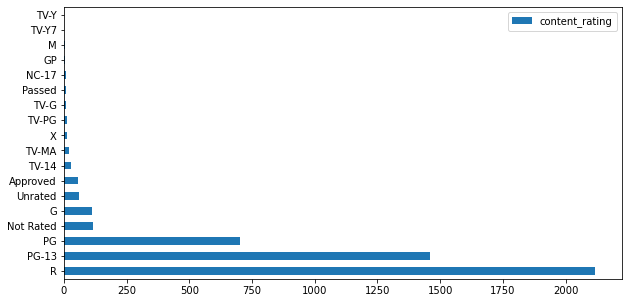

In [21]:
(df.content_rating
 .value_counts()
 .to_frame()  # Below are the default values, except `figsize`
 .plot.barh(figsize=(10, 5)));

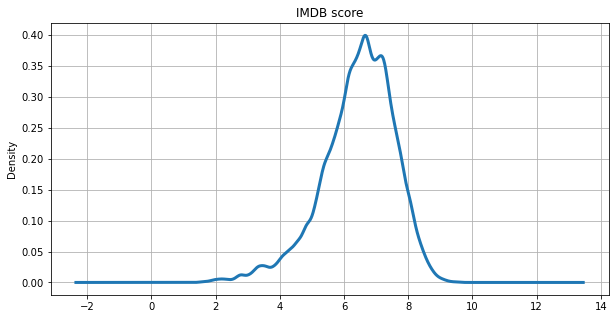

In [22]:
df.imdb_score.plot.kde(bw_method=0.1, grid=True, title='IMDB score', lw=3, figsize=(10, 5));

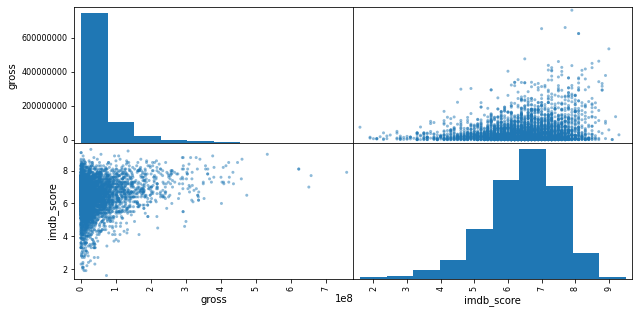

In [23]:
plot = pd.plotting.scatter_matrix(df, alpha=0.5, figsize=(10, 5))

# (4) Selecting and computing new columns

This section is about selecting subsets of a datset, or creating new data from existing data, i.e.:

- Selecting a **single column**, or a **subset of columns**.
- Selecting a **subset of rows**, i.e. filtering.
- Chaining and/or combining the above operations to accomplish both.


## (4.2) Selecting subsets of columns

Selecting two or more columns.

In [24]:
df[['movie_title', 'country']].head(2)

,movie_title,country
0,Avatar,USA
1,Pirates of the Caribbean: At World's End,USA


The most useful selection function is `df.loc[[row1, row2, ...], [col1, col2, ...]]`.

- `df.loc[:, [col1, col2]]` selects every row, and columns `[col1, col2]`
- `df.loc[[row1, row2], :]` selects rows `[row1, row2]`, and every column

Instead of selecting a subset of columns to *keep*, we can select a subset to *drop*.

In [25]:
# Drop specified labels from rows or columns
df.drop(columns=['director_name', 'gross', 'movie_title']).head(3)

,country,content_rating,imdb_score
0,USA,PG-13,7.9
1,USA,PG-13,7.1
2,UK,PG-13,6.8


## (4.5) Creating new columns

In [26]:
temp = df.copy()  # Copy the DataFrame

# Create a new column - based on the gross income
temp['log_gross'] = temp['gross'].apply(np.log10)

temp.head(2)

,director_name,gross,movie_title,country,content_rating,imdb_score,log_gross
0,James Cameron,760505847.0,Avatar,USA,PG-13,7.9,8.881103
1,Gore Verbinski,309404152.0,Pirates of the Caribbean: At World's End,USA,PG-13,7.1,8.490526


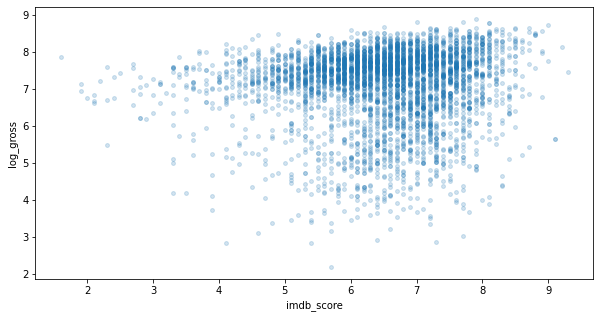

In [27]:
temp.plot.scatter(x='imdb_score', y='log_gross', alpha=0.2, s=15, figsize=(10, 5));

## (5.2) Group membership and string filtering

In [28]:
# Top three movies from Japan or Hong Kong
df[df.country.isin(['Japan', 'Hong Kong'])].nlargest(5, 'imdb_score')

,director_name,gross,movie_title,country,content_rating,imdb_score
4747,Akira Kurosawa,269061.0,Seven Samurai,Japan,Unrated,8.7
2373,Hayao Miyazaki,10049886.0,Spirited Away,Japan,PG,8.6
2323,Hayao Miyazaki,2298191.0,Princess Mononoke,Japan,PG-13,8.4
98,Hideaki Anno,NaN,Godzilla Resurgence,Japan,NaN,8.2
204,Hideaki Anno,NaN,Godzilla Resurgence,Japan,NaN,8.2


In [29]:
# Movies and TV shows NOT from scandinavia
df[~df.country.isin(['Norway, Sweden', 'Denmark'])].head(3)

,director_name,gross,movie_title,country,content_rating,imdb_score
0,James Cameron,760505847.0,Avatar,USA,PG-13,7.9
1,Gore Verbinski,309404152.0,Pirates of the Caribbean: At World's End,USA,PG-13,7.1
2,Sam Mendes,200074175.0,Spectre,UK,PG-13,6.8


In [30]:
# Contains the word 'lord'
mask = df.movie_title.str.lower().str.contains("lord")

 # Gross better than 25 % of the movies
mask = mask & (df.gross > df.gross.quantile(q=0.25))

df[mask]

,director_name,gross,movie_title,country,content_rating,imdb_score
270,Peter Jackson,313837577.0,The Lord of the Rings: The Fellowship of the R...,New Zealand,PG-13,8.8
339,Peter Jackson,377019252.0,The Lord of the Rings: The Return of the King,USA,PG-13,8.9
340,Peter Jackson,340478898.0,The Lord of the Rings: The Two Towers,USA,PG-13,8.7
1170,Andrew Niccol,24127895.0,Lord of War,USA,R,7.6
1974,Catherine Hardwicke,11008432.0,Lords of Dogtown,USA,PG-13,7.1


## (9.1) Dummy variables for categorical data

We start by re-loading the data.

In [31]:
# We want pandas to display more columns and rows
pd.set_option('display.max_rows', 2**6)
pd.set_option('display.max_columns', 2**6)


# We reload the data
cols_to_use = ['movie_title', 'duration', 'genres', 'content_rating', 'budget', 'gross']
df_model = pd.read_csv(r'data/movie_metadata.csv', sep=',', usecols=cols_to_use)
print(f'Loaded data of size {df_model.shape} into memory.')

Loaded data of size (5043, 6) into memory.


In [32]:
# Drop any row with missing information
df_model = df_model.dropna(axis=0, how='any').drop_duplicates(subset=None)
df_model.shape

(3739, 6)

In [33]:
df_model.sample(5, random_state=3)

,duration,gross,genres,movie_title,content_rating,budget
74,96.0,100289690.0,Comedy|Family|Fantasy,Evan Almighty,PG,175000000.0
1524,138.0,141340178.0,Drama|Thriller,A Few Good Men,R,40000000.0
3032,107.0,50461335.0,Drama|Fantasy|Music|Romance,If I Stay,PG-13,11000000.0
332,126.0,63540020.0,Action|Adventure|Sci-Fi,The Fifth Element,PG-13,93000000.0
1163,122.0,41252428.0,Comedy|Drama|Romance,The Mirror Has Two Faces,PG-13,42000000.0


How to apply one-hot-encoding using `pandas.get_dummies`.

In [34]:
df_model.content_rating.to_frame().sample(3, random_state=3)

,content_rating
74,PG
1524,R
3032,PG-13


In [35]:
dummies = pd.get_dummies(df_model.content_rating)
dummies.sample(3, random_state=3)

,Approved,G,GP,M,NC-17,Not Rated,PG,PG-13,Passed,R,Unrated,X
74,0,0,0,0,0,0,1,0,0,0,0,0
1524,0,0,0,0,0,0,0,0,0,1,0,0
3032,0,0,0,0,0,0,0,1,0,0,0,0


In [36]:
# Merge the dummy variables into the original data set
df_model = df_model.merge(dummies, how='left', left_index=True, right_index=True)
df_model = df_model.drop(columns='content_rating', errors='ignore')
df_model.sample(5, random_state=3)

,duration,gross,genres,movie_title,budget,Approved,G,GP,M,NC-17,Not Rated,PG,PG-13,Passed,R,Unrated,X
74,96.0,100289690.0,Comedy|Family|Fantasy,Evan Almighty,175000000.0,0,0,0,0,0,0,1,0,0,0,0,0
1524,138.0,141340178.0,Drama|Thriller,A Few Good Men,40000000.0,0,0,0,0,0,0,0,0,0,1,0,0
3032,107.0,50461335.0,Drama|Fantasy|Music|Romance,If I Stay,11000000.0,0,0,0,0,0,0,0,1,0,0,0,0
332,126.0,63540020.0,Action|Adventure|Sci-Fi,The Fifth Element,93000000.0,0,0,0,0,0,0,0,1,0,0,0,0
1163,122.0,41252428.0,Comedy|Drama|Romance,The Mirror Has Two Faces,42000000.0,0,0,0,0,0,0,0,1,0,0,0,0


-----------------

Notice now the **genres** column above. Here each row has a variable number of genres.

We now show how to dummy-encode this categorical data.

In [37]:
from functools import reduce

# Split the genres, take the union over every set to get every genre in the data set
genres_sets = df_model.genres.str.split('|').apply(set)
genres = reduce(set.union, genres_sets)
print(genres)

{'Action', 'Music', 'Documentary', 'Biography', 'War', 'Adventure', 'Romance', 'Western', 'History', 'Family', 'Mystery', 'Crime', 'Sport', 'Thriller', 'Musical', 'Drama', 'Horror', 'Comedy', 'Animation', 'Fantasy', 'Sci-Fi', 'Film-Noir'}


In [38]:
# For every genre, add a dummy column
for genre in genres:
    df_model[genre] = np.where(df_model.genres.str.contains(genre), 1, 0)
    
df_model = df_model.drop(columns='genres', errors='ignore')

In [39]:
df_model.head(2)

,duration,gross,movie_title,budget,Approved,G,GP,M,NC-17,Not Rated,PG,PG-13,Passed,R,Unrated,X,Action,Music,Documentary,Biography,War,Adventure,Romance,Western,History,Family,Mystery,Crime,Sport,Thriller,Musical,Drama,Horror,Comedy,Animation,Fantasy,Sci-Fi,Film-Noir
0,178.0,760505847.0,Avatar,237000000.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,169.0,309404152.0,Pirates of the Caribbean: At World's End,300000000.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# Problems

Look at the following API references, as well as the code above, to solve the problems below:

- https://pandas.pydata.org/pandas-docs/stable/reference/index.html
- https://scikit-learn.org/stable/modules/classes.html

---------------------------

In [40]:
from sklearn.datasets import fetch_california_housing

# Load the data object
data_object = fetch_california_housing()

# Print the data description
print(data_object.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [41]:
# Create a data frame with features, and a target y`
df = pd.DataFrame(data_object.data, columns=data_object.feature_names)
y = data_object.target

df.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
2345,2.5446,13.0,4.118919,0.989189,994.0,2.686486,36.81,-119.69
7429,2.2988,35.0,3.635434,1.107325,2248.0,3.829642,33.95,-118.21
9846,4.6964,31.0,6.316770,1.040373,966.0,3.000000,36.59,-121.91
2321,1.8061,5.0,3.002762,0.933702,623.0,1.720994,36.83,-119.71
9064,3.5732,5.0,4.640919,1.112660,6291.0,2.370384,34.67,-118.15


## Problem 1: How many rows does the data set have?

In [42]:
# Count the rows of the DataFrame `df` here
# The Pandas API reference might be useful

## Problem 2: Are the any missing (NULL) valies in the data set? If yes, which?

## Problem 3: Split the data into a training and test set

In [43]:
# See docs: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split

## Problem 4: Plot the data in the `HouseAge` column in of the training data

In [44]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

## Problem 5: Compute how the variables in the training data set correlate with the target

- Use the Pearson correlation.
- Which variable correlates the most strongly with the target column `y`? Does this make intuitive sense?

In [45]:
# To create a new column in `df` with a target, use code like this:
# df_with_y = df.assign(target=y)

## Problem 6: Fit a linear model to the training data

In [46]:
# docs: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression


## Problem 7: Compute the mean squared error on the training data and test data

In [47]:
from sklearn.metrics import mean_squared_error

## Problem 8: Plot the distributions of training errors

In [48]:
# y_pred = model.predict(X_train)
# errors = y_pred - y_train # training errors
# plt.hist(errors)

## Problem 9: Try to engineer some features and to decrease test set errors

For instance, try the following:

- Take log of columns
- Multiply columns together
- Create some [polynomial features](https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)

In [49]:
from sklearn.preprocessing import PolynomialFeatures

## Problem 10: Load your own data set, visualize and investigate it, train a model

Get some data from any source. 

Some data sources:
- Wikipedia tables
- `sklearn.datasets`
- UCI Machine Learning Repository: Data Sets : https://archive.ics.uci.edu/ml/datasets.php

Use code like the one below to download tabular data:

In [50]:
# Read HTML tables into a list of DataFrame objects.
url = r'https://en.wikipedia.org/wiki/List_of_Germans_by_net_worth'
tables = pd.read_html(url, header=0)

df_net_worth = tables[0]